In [12]:
import matplotlib.pyplot as plt
import json
import pandas as pd

# import JSON
with open('Timescale_results.json') as json_file:
    results = json.load(json_file)

In [13]:
# Create DataFrame
df = pd.DataFrame(results)

In [14]:
# Drop the QueryString, as this column has no value for the statistical analysis. It was recorded for historization purposes and to make the results traceable
df = df.drop(columns='QueryString')
# Queries that have returned 0 rows might skewers the results, as there is no guarantee, the Query was actually executed. Therefore these results are dropped.
df = df[df.NumberOfRowsReturned != 0]
# Drop Queries for Range 80, as they don't exist for every Amount of RowsInDataBase
df = df[df.QueryType != 'Range, 80']
df

,QueryType,Minimum,Maximum,Median,Mean,StandardDeviation,NumberOfRowsReturned,DatabaseSize,RowsInDataBase,EstimatedMonthlyCosts,NumberOfRuns
0,Point,19.0,58.0,19.0,23.6,12.2311,1,GP_Gen5_2,100000000,128.79,10
3,"Range, 10",24.0,58.0,25.5,30.2,10.6854,2500,GP_Gen5_2,100000000,128.79,10
4,"Range, 10",24.0,30.0,25.0,25.5,1.7795,2500,GP_Gen5_2,100000000,128.79,10
5,"Range, 10",24.0,26.0,24.0,24.5,0.7071,2500,GP_Gen5_2,100000000,128.79,10
6,"Range, 20",30.0,40.0,31.0,32.1,3.0350,5000,GP_Gen5_2,100000000,128.79,10
...,...,...,...,...,...,...,...,...,...,...,...
154,"Range, 50",19.0,21.0,19.0,19.3,0.6749,125,GP_Gen5_16,1000000,1010.78,10
155,"Range, 50",19.0,34.0,19.5,21.2,4.6619,125,GP_Gen5_16,1000000,1010.78,10
159,Aggregate,19.0,34.0,19.0,20.5,4.7434,1,GP_Gen5_16,1000000,1010.78,10
160,Aggregate,19.0,33.0,19.0,20.5,4.4033,1,GP_Gen5_16,1000000,1010.78,10


In [15]:
# Next step is to aggregate the QueryTypes for each Scale
# Before there were 3 Queries, for each Querytype for each Databasesize, for each RowsInDataBase. Now there is only 1 aggregated.
df = df.groupby(['QueryType','DatabaseSize', 'RowsInDataBase','EstimatedMonthlyCosts'], as_index=False).agg(
    {
         'Median': 'mean',
         'Mean': 'mean',
         'Maximum': 'max',
         'Minimum': 'min',
    }
)
df

,QueryType,DatabaseSize,RowsInDataBase,EstimatedMonthlyCosts,Median,Mean,Maximum,Minimum
0,Aggregate,GP_Gen5_16,1000000,1010.78,19.000000,20.866667,44.0,19.0
1,Aggregate,GP_Gen5_16,10000000,1010.78,22.333333,42.500000,294.0,21.0
2,Aggregate,GP_Gen5_16,100000000,1010.78,43.500000,2414.200000,28557.0,40.0
3,Aggregate,GP_Gen5_2,1000000,128.79,19.000000,19.266667,23.0,19.0
4,Aggregate,GP_Gen5_2,10000000,128.79,23.000000,39.400000,211.0,22.0
5,Aggregate,GP_Gen5_2,100000000,128.79,44.833333,45.766667,56.0,43.0
6,Aggregate,GP_Gen5_8,1000000,506.78,19.000000,21.033333,41.0,19.0
7,Aggregate,GP_Gen5_8,10000000,506.78,22.500000,39.600000,214.0,22.0
8,Aggregate,GP_Gen5_8,100000000,506.78,42.500000,42.650000,47.0,40.0
9,Point,GP_Gen5_16,1000000,1010.78,19.000000,20.266667,37.0,18.0


In [16]:
# Get Subsets on which to create Plots
df1 = df.copy(deep=True)
df_index_RowsInDB = df1.set_index('RowsInDataBase', inplace=True)
df_index_RowsInDB = df1.loc[[1000000, 10000000, 100000000], :]
df_GP_Gen5_2 = df_index_RowsInDB[df_index_RowsInDB.DatabaseSize == 'GP_Gen5_2']
df_GP_Gen5_8 = df_index_RowsInDB[df_index_RowsInDB.DatabaseSize == 'GP_Gen5_8']
df_GP_Gen5_16 = df_index_RowsInDB[df_index_RowsInDB.DatabaseSize == 'GP_Gen5_16']


df_index_DBSize = df.set_index('EstimatedMonthlyCosts', inplace=True)
df_index_DBSize = df.loc[[128.79, 506.78, 1010.78], :]
df_1Mil = df_index_DBSize[df_index_DBSize.RowsInDataBase == 1000000]
df_10Mil = df_index_DBSize[df_index_DBSize.RowsInDataBase == 10000000]
df_100Mil = df_index_DBSize[df_index_DBSize.RowsInDataBase == 100000000]


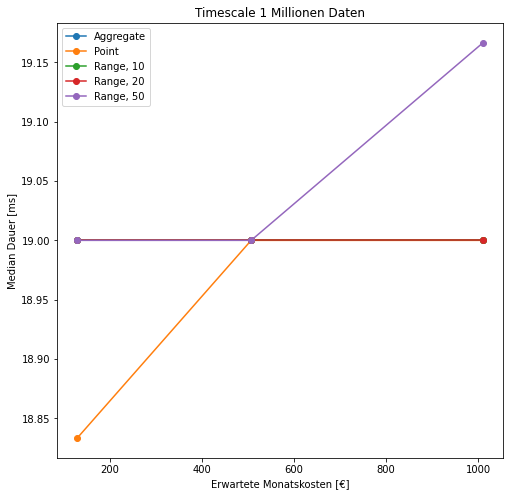

In [17]:
df_1Mil.groupby('QueryType')['Median'].plot(marker='o',legend=True, xlabel='Erwartete Monatskosten [€]', ylabel='Median Dauer [ms]', figsize=(8,8),  title= 'Timescale 1 Millionen Daten')
plt.savefig('./Plots/Timescale_1Mil.png', bbox_inches='tight')

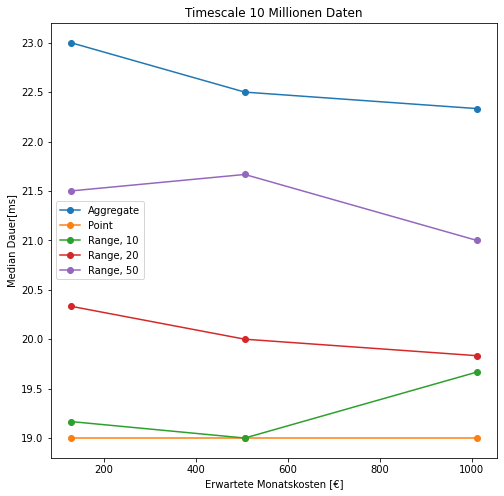

In [18]:
df_10Mil.groupby('QueryType')['Median'].plot(marker='o',legend=True, xlabel='Erwartete Monatskosten [€]',ylabel='Median Dauer[ms]', figsize=(8,8),  title= 'Timescale 10 Millionen Daten')
plt.savefig('./Plots/Timescale_10Mil.png', bbox_inches='tight')

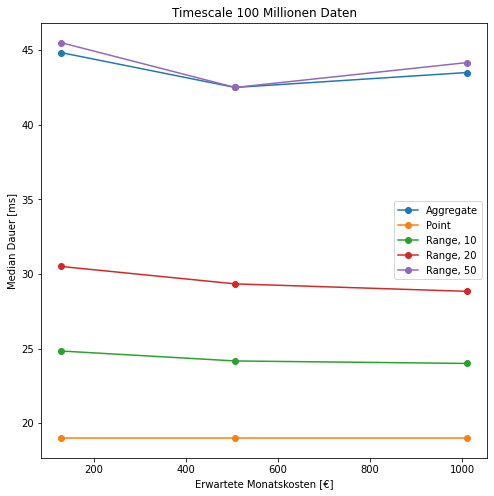

In [19]:
df_100Mil.groupby('QueryType')['Median'].plot(marker='o',legend=True, xlabel='Erwartete Monatskosten [€]',ylabel='Median Dauer [ms]', figsize=(8,8), title= 'Timescale 100 Millionen Daten')
plt.savefig('./Plots/Timescale_100Mil.png', bbox_inches='tight')

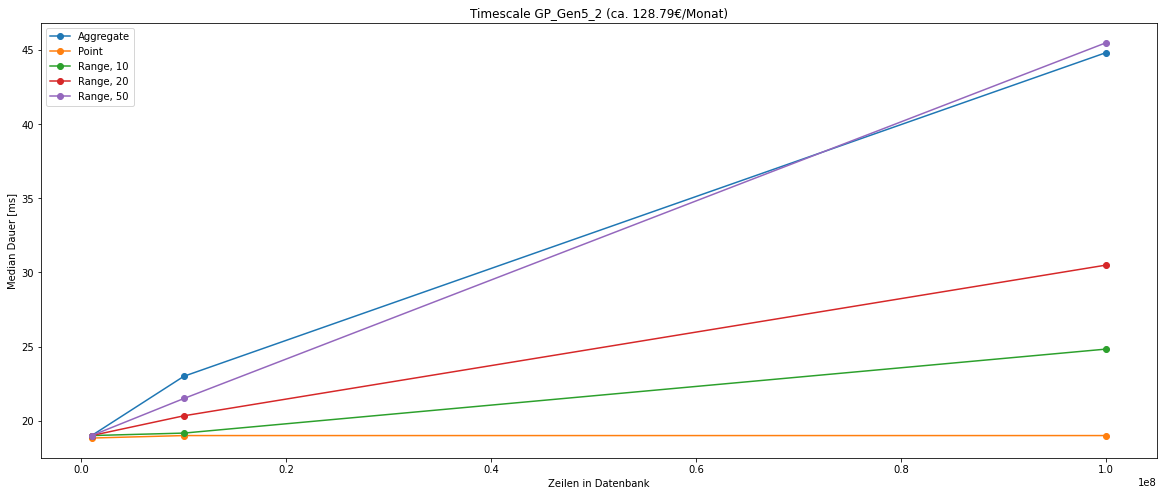

In [20]:
df_GP_Gen5_2.groupby('QueryType')['Median'].plot(marker='o',legend=True, xlabel='Zeilen in Datenbank', ylabel='Median Dauer [ms]', figsize=(20,8), title= 'Timescale GP_Gen5_2 (ca. 128.79€/Monat)')
plt.savefig('./Plots/Timescale_GP_Gen5_2.png', bbox_inches='tight')

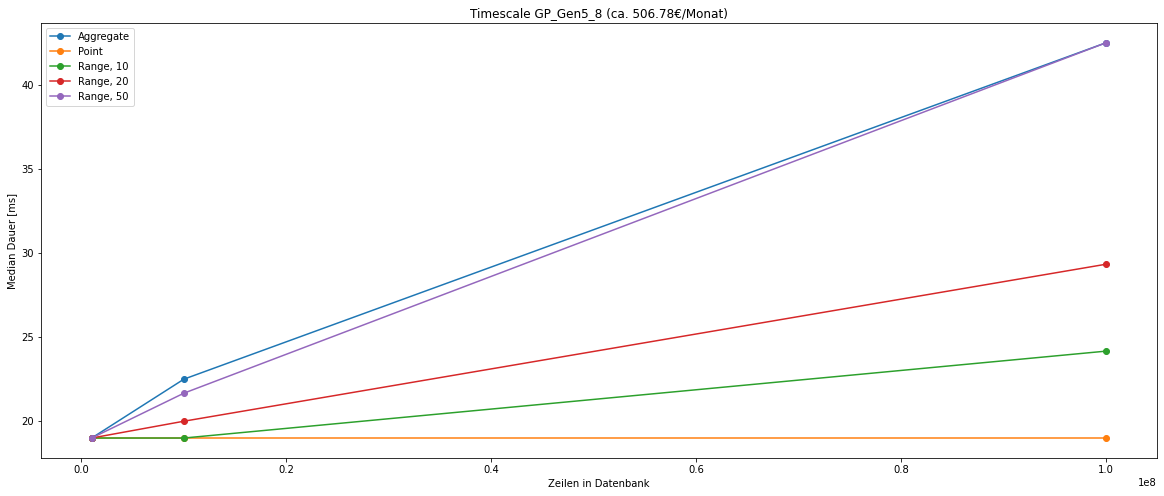

In [21]:
df_GP_Gen5_8.groupby('QueryType')['Median'].plot(marker='o',legend=True, xlabel='Zeilen in Datenbank', ylabel='Median Dauer [ms]', figsize=(20,8), title= 'Timescale GP_Gen5_8 (ca. 506.78€/Monat)')
plt.savefig('./Plots/Timescale_GP_Gen5_8.png', bbox_inches='tight')

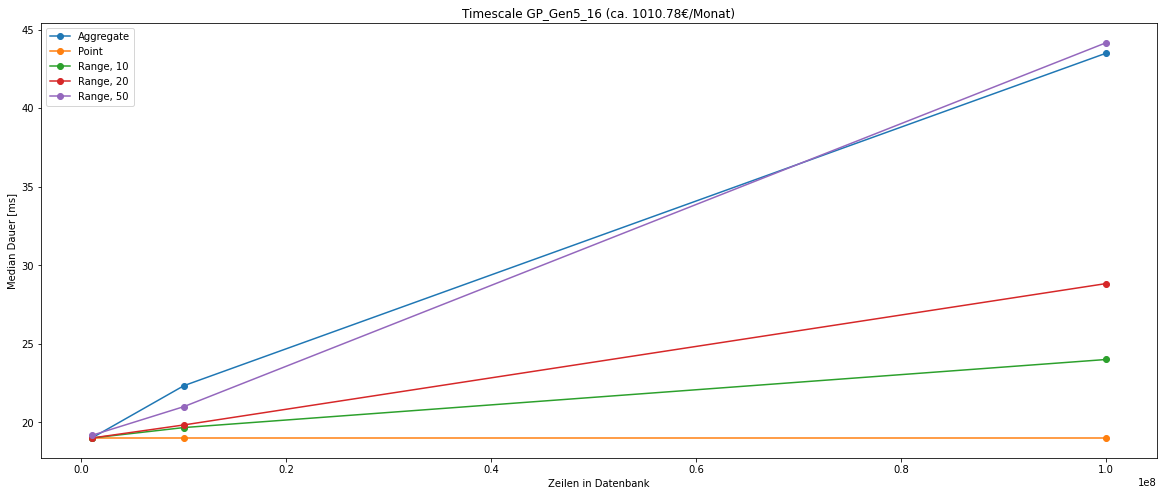

In [22]:
df_GP_Gen5_16.groupby('QueryType')['Median'].plot(marker='o',legend=True, xlabel='Zeilen in Datenbank', ylabel='Median Dauer [ms]', figsize=(20,8), title= 'Timescale GP_Gen5_16 (ca. 1010.78€/Monat)')
plt.savefig('./Plots/Timescale_GP_Gen5_16.png', bbox_inches='tight')